<h1>Emotions Prediction - Exploratory Data Analysis</h>

<h3>Data Description</h3>

This dataset contains emotions expressed through text and the emotions included in the data are ["joy","sadness","anger","fear","love","surprise"].

<h3>Problem Statement</h3>
<br>
Since it deals with the text and we are classifying the text into respective emotions(labels) this is clearly a NLP text classfication problem. We have multiple emotions(labels) in our dataset hence it is a multi-classification problem.

Natural language processing (NLP): is the ability of a computer program to understand human language as it is spoken and written -- referred to as natural language.

<h3>Import Dependencies</h3>

In [191]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
#word and sentence tokenization
from nltk import sent_tokenize, word_tokenize
#part of speect tagging
from nltk import pos_tag
#lemmatization
from nltk.stem import WordNetLemmatizer
#stemming
from nltk.stem import PorterStemmer
#remove stop word in english
from nltk.corpus import stopwords
#string
import string
import re
#Sentiment Analysis 
from textblob import TextBlob

<h3>Load Dataset</h3>

In [192]:
#load the dataset from text files
train_set = pd.read_csv('dataset/train.txt', delimiter = ";", header=None)
test_set = pd.read_csv('dataset/test.txt', delimiter = ";", header=None)
val_set = pd.read_csv('dataset/val.txt', delimiter = ";", header=None)
#data = pd.concat([train_set,train_set,train_set])
#text files are used read_csv function to import 

In [193]:
#define the columns name of train names
train_set.rename(columns={
    0:'text',
    1:'emotion'
}, inplace=True)
#define the columns name of test names
test_set.rename(columns={
    0:'text',
    1:'emotion'
}, inplace=True)
#define the columns name of validation set
val_set.rename(columns={
    0:'text',
    1:'emotion'
}, inplace=True)

In [194]:
#merge the data set
dataset = train_set + test_set 
print(dataset.head(3))

                                                text         emotion
0  i didnt feel humiliatedim feeling rather rotte...  sadnesssadness
1  i can go from feeling so hopeless to so damned...  sadnesssadness
2  im grabbing a minute to post i feel greedy wro...    angersadness


<h3>Data Wrangling - Cleansing</h3>

In [195]:
#create a function to check data info
def check_data_info(data):
    print("**"*54)
    print("Dataset Shape")
    print(data.shape)  
    print("**"*54)
    print("Dataset Data Types")
    print(data.dtypes)
    print("**"*54)
    print("Dataset Column Names")
    print(data.columns)
    print("**"*54)
    print("Number NULL of Dataset")
    print(data.isnull().sum())
    print("**"*54)

In [196]:
#check train set
check_data_info(train_set)

************************************************************************************************************
Dataset Shape
(16000, 2)
************************************************************************************************************
Dataset Data Types
text       object
emotion    object
dtype: object
************************************************************************************************************
Dataset Column Names
Index(['text', 'emotion'], dtype='object')
************************************************************************************************************
Number NULL of Dataset
text       0
emotion    0
dtype: int64
************************************************************************************************************


In [197]:
#check train set
check_data_info(test_set)

************************************************************************************************************
Dataset Shape
(2000, 2)
************************************************************************************************************
Dataset Data Types
text       object
emotion    object
dtype: object
************************************************************************************************************
Dataset Column Names
Index(['text', 'emotion'], dtype='object')
************************************************************************************************************
Number NULL of Dataset
text       0
emotion    0
dtype: int64
************************************************************************************************************


In [198]:
#check train set
check_data_info(val_set)

************************************************************************************************************
Dataset Shape
(2000, 2)
************************************************************************************************************
Dataset Data Types
text       object
emotion    object
dtype: object
************************************************************************************************************
Dataset Column Names
Index(['text', 'emotion'], dtype='object')
************************************************************************************************************
Number NULL of Dataset
text       0
emotion    0
dtype: int64
************************************************************************************************************


In [199]:
#create a function to convert text into lowercase
def convert_to_lowercase(text):
    text = text.str.lower()
    return text

#create a function to remove punctuation
def remove_punctuation(text):
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text
remove_pun = lambda x: remove_punctuation(x)

#create a function to apply word tokenization
def convert_to_word_tokens(text):
    text = text.word_tokenize(text)
    return text

#create a function to apply word tokenization
def convert_to_sentence_tokens(text):
    text = text.sent_tokenize(text)
    return text

#create a function to apply word tokenization
def convert_to_pos_tagging(text):
    text = text.pos_tag(text)
    return text

#calculate word length
def text_length_calculation(text):
    return len(text.split(' '))

In [200]:
#remove stop word in english
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

#download the stopword
#if no this code. stopwords wont be worked
#nltk.download('stopwords')

#define the stopword
#stopwords = set(STOPWORDS)
cachedStopWords = stopwords.words("english")

def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in cachedStopWords])
    return text

In [201]:
#check the stop words
print(cachedStopWords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

<h3>The Methodologies to wrangling the text data</h3>


**1. Common data cleaning steps on all text:**
* Make text all lower case
* Remove punctuation
* Remove numerical values
* Remove common non-sensical text (/n)
* Tokenize text
* Remove stop words

**2. More data cleaning steps after tokenization:**
* Stemming / lemmatization
* Parts of speech tagging
* Create bi-grams or tri-grams
* Deal with typos
* And more...

In [202]:
#***************************************************Train Set*****************************************************
#I will apply the method 1

#convert feedback to lowercase
train_set.text = convert_to_lowercase(train_set.text)
train_set.emotion = convert_to_lowercase(train_set.emotion)
#remove punctuation
train_set.text = pd.DataFrame(train_set.text.apply(remove_punctuation))
train_set.emotion = pd.DataFrame(train_set.emotion.apply(remove_punctuation))
#remove stop word
train_set.text = pd.DataFrame(train_set.text.apply(remove_stopwords))
train_set.emotion = pd.DataFrame(train_set.emotion.apply(remove_stopwords))
#tokenize the text

In [203]:
#***************************************************Test Set*****************************************************
#I will apply the method 1

#convert feedback to lowercase
test_set.text = convert_to_lowercase(test_set.text)
test_set.emotion = convert_to_lowercase(test_set.emotion)
#remove punctuation
test_set.text = pd.DataFrame(test_set.text.apply(remove_punctuation))
test_set.emotion = pd.DataFrame(test_set.emotion.apply(remove_punctuation))
#remove stop word
test_set.text = pd.DataFrame(test_set.text.apply(remove_stopwords))
test_set.emotion = pd.DataFrame(test_set.emotion.apply(remove_stopwords))
#tokenize the text

In [204]:
#*********************************************Validation Set*****************************************************
#I will apply the method 1

#convert feedback to lowercase
val_set.text = convert_to_lowercase(val_set.text)
val_set.emotion = convert_to_lowercase(val_set.emotion)
#remove punctuation
val_set.text = pd.DataFrame(val_set.text.apply(remove_punctuation))
val_set.emotion = pd.DataFrame(val_set.emotion.apply(remove_punctuation))
#remove stop word
val_set.text = pd.DataFrame(val_set.text.apply(remove_stopwords))
val_set.emotion = pd.DataFrame(val_set.emotion.apply(remove_stopwords))
#tokenize the text

In [205]:
print(train_set.head())
print("*" * 54)
print(test_set.head())
print("*" * 54)
print(val_set.head())

                                                text  emotion
0                              didnt feel humiliated  sadness
1  go feeling hopeless damned hopeful around some...  sadness
2          im grabbing minute post feel greedy wrong    anger
3  ever feeling nostalgic fireplace know still pr...     love
4                                    feeling grouchy    anger
******************************************************
                                                text  emotion
0        im feeling rather rotten im ambitious right  sadness
1                       im updating blog feel shitty  sadness
2    never make separate ever want feel like ashamed  sadness
3  left bouquet red yellow tulips arm feeling sli...      joy
4                            feeling little vain one  sadness
******************************************************
                                                text  emotion
0           im feeling quite sad sorry ill snap soon  sadness
1  feel like still loo

<h3>Data Analysis</h3>

In [206]:
#check unique values
def unique_values(data):
    print(data.unique())
    print("*"*54)
    print(data.value_counts())

In [207]:
def draw_bar_plot(data, x,y,hue, title, xlabel, ylabel):
    plt.figure(figsize=(15,5))
    sns.barplot(
        x=x,
        y=y,
        hue=hue,
        data = data,
    )
    plt.title(title, fontweight='bold')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

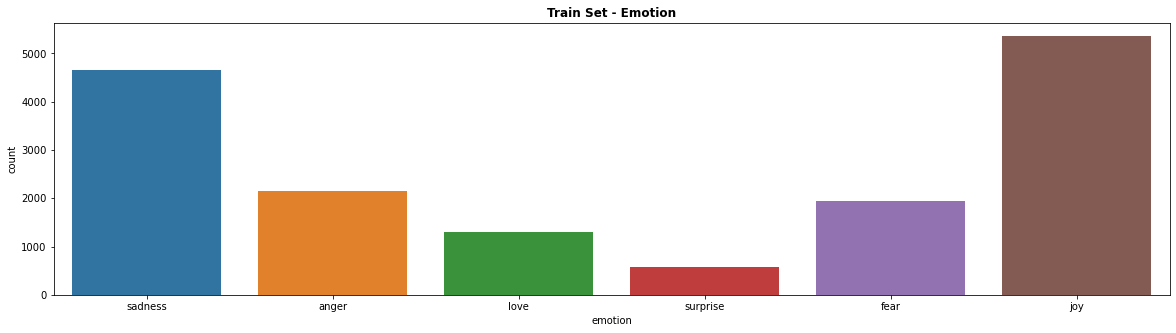

['sadness' 'anger' 'love' 'surprise' 'fear' 'joy']
******************************************************
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: emotion, dtype: int64
None


In [208]:
#***************************************************Train Set*****************************************************

plt.figure(figsize=(20,5))
sns.countplot(x='emotion', data=train_set)
plt.title("Train Set - Emotion",fontweight = 'bold')
plt.show()

#check train set unique values
#unique_values(train_set.text)
print(unique_values(train_set.emotion))

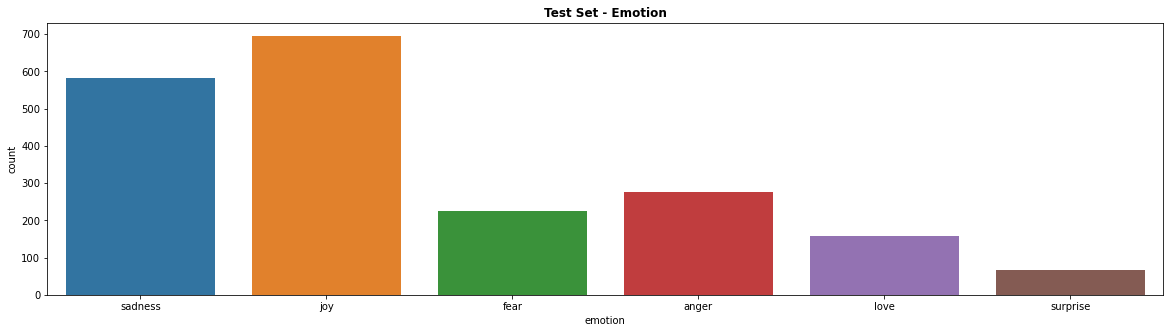

['sadness' 'joy' 'fear' 'anger' 'love' 'surprise']
******************************************************
joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: emotion, dtype: int64
None


In [209]:
#***************************************************Test Set*****************************************************

plt.figure(figsize=(20,5))
sns.countplot(x='emotion', data=test_set)
plt.title("Test Set - Emotion",fontweight = 'bold')
plt.show()
#check test set unique values
#unique_values(test_set.text)
print(unique_values(test_set.emotion))

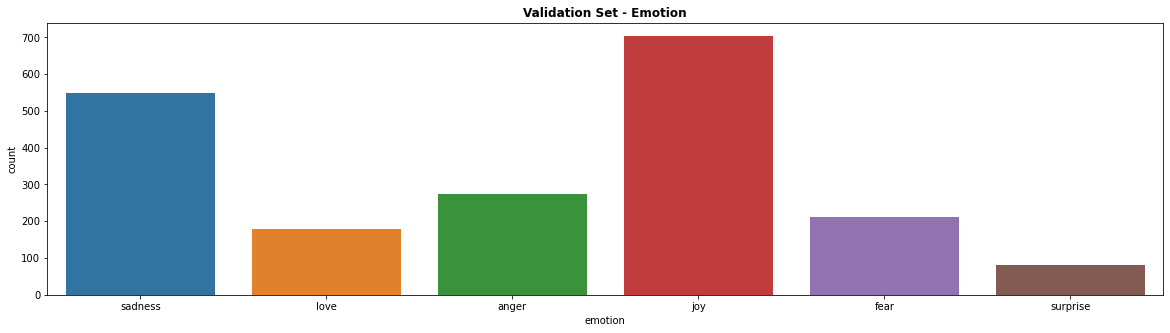

['sadness' 'love' 'anger' 'joy' 'fear' 'surprise']
******************************************************
joy         704
sadness     550
anger       275
fear        212
love        178
surprise     81
Name: emotion, dtype: int64
None


In [210]:
#************************************************Validation Set*************************************************

plt.figure(figsize=(20,5))
sns.countplot(x='emotion', data=val_set)
plt.title("Validation Set - Emotion",fontweight = 'bold')
plt.show()
#check val set unique values
#unique_values(val_set.text)
print(unique_values(val_set.emotion))

<h4>Sentiment Analysis</h4>

In [211]:
#concat the train and test sets
data = pd.concat([train_set,test_set])
data.rename(columns={
    0:'text',
    1:'emotion'
}, inplace=True)
print(list(data.shape))

[18000, 2]


In [212]:
#create a function to analyst the sentiment 
def analyst_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        result='positive'
    elif sentiment < 0:
        result='negative'
    else:
        result='neutral'
    return result

#test the function
print(analyst_sentiment("I LOVE MYSELFT"))

positive


In [213]:
#let's add a column of sentiment 
data['sentiment'] = data['text'].apply(analyst_sentiment)

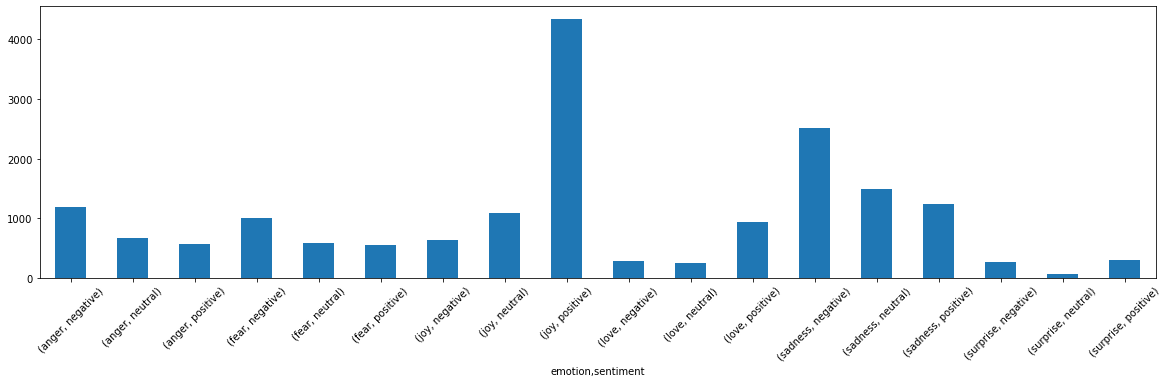

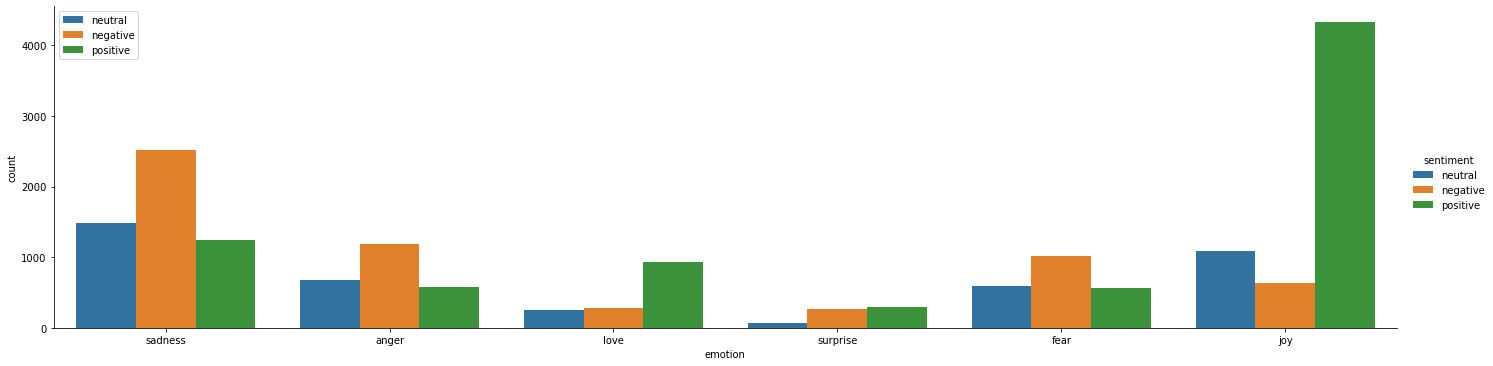

emotion   sentiment
anger     negative     1189
          neutral       672
          positive      573
fear      negative     1012
          neutral       589
          positive      560
joy       negative      630
          neutral      1094
          positive     4333
love      negative      281
          neutral       251
          positive      931
sadness   negative     2518
          neutral      1486
          positive     1243
surprise  negative      269
          neutral        70
          positive      299
dtype: int64

In [214]:
#let's compare emotion - sentiment
#x=data.emotion.value_counts()
plt.figure(figsize=(20,5))
data.groupby(['emotion', 'sentiment']).size().plot(kind='bar')
plt.xticks(rotation='45')
sns.catplot(x='emotion', hue='sentiment', data=data , kind='count', height=5, aspect=11.7/3)
plt.legend(loc='best')
plt.xticks(rotation='0')
plt.show()
data.groupby(['emotion', 'sentiment']).size()

In [215]:
#key words extractions
from collections import Counter

#number variable is the number of keywords sets it as defualt
def extract_keywords(text, number=50):
    tokens = [ tok for tok in text.split() ]
    most_key_words = Counter(tokens).most_common(number)
    return dict(most_key_words) 

In [216]:
#list of emotions 
emotion_lists = data['emotion'].unique().tolist()
print(emotion_lists)

['sadness', 'anger', 'love', 'surprise', 'fear', 'joy']


In [217]:
#set the keywords in each emotion
#it will be an error if I dont add values!!!!!!!
sadness_list = data[data['emotion'] == 'sadness'].values.tolist()
anger_list = data[data['emotion'] == 'anger'].values.tolist()
love_list = data[data['emotion'] == 'love'].values.tolist()
surprise_list = data[data['emotion'] == 'surprise'].values.tolist()
fear_list = data[data['emotion'] == 'fear'].values.tolist()
joy_list = data[data['emotion'] == 'joy'].values.tolist()

In [218]:
#set the extract the keywords in each emotion
sadness_document = ' '.join(map(str, sadness_list))
anger_document = ' '.join(map(str, anger_list))
love_document = ' '.join(map(str, love_list))
surprise_document = ' '.join(map(str, surprise_list))
fear_document = ' '.join(map(str, fear_list))
joy_document = ' '.join(map(str, joy_list))

In [219]:
# Extract the keywords in each emotion
sadness_keywords = extract_keywords(joy_document)
anger_keywords = extract_keywords(anger_document)
love_keywords = extract_keywords(love_document)
surprise_keywords = extract_keywords(surprise_document)
fear_keywords = extract_keywords(fear_document)
joy_keywords = extract_keywords(joy_document)

In [220]:
#create a function to check and plot the keywords in each emotion
def draw_plot_keywords(my_dict, title):
    #define a dataframa and columns name
    dataframe = pd.DataFrame(my_dict.items(), columns=['tokens', 'counts'])
    #plot
    plt.figure(figsize=(15,5))
    sns.barplot(x='tokens', y='counts', data=dataframe)
    plt.title(title, fontweight='bold')
    plt.xticks(rotation='45')
    plt.show()

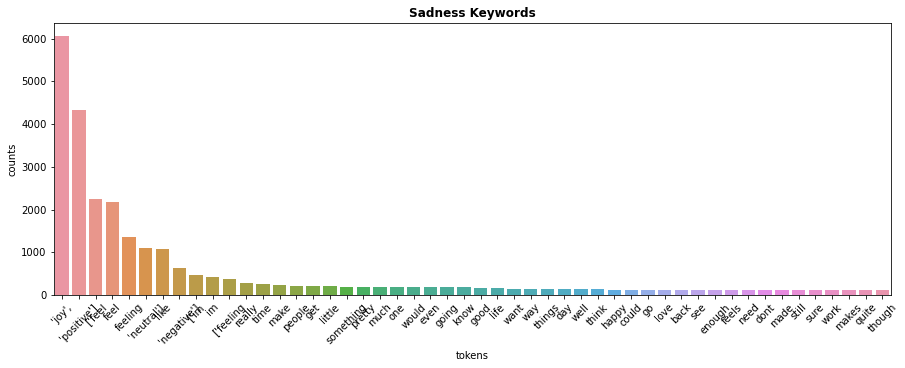

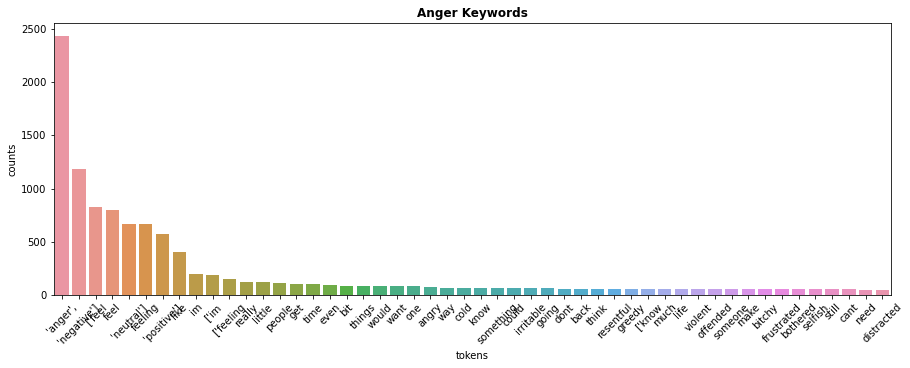

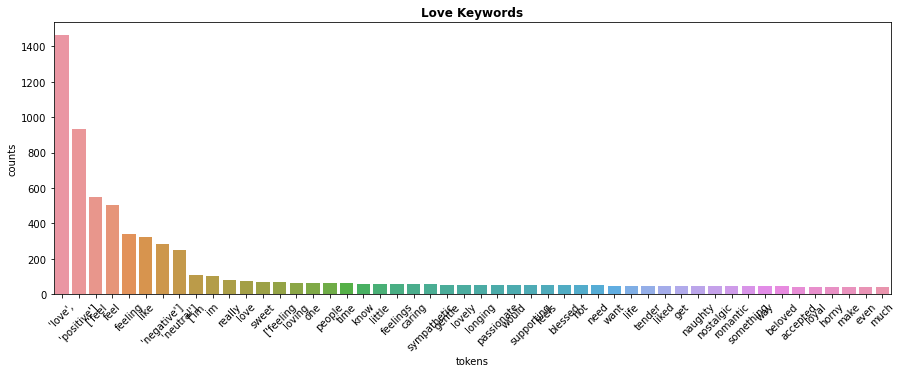

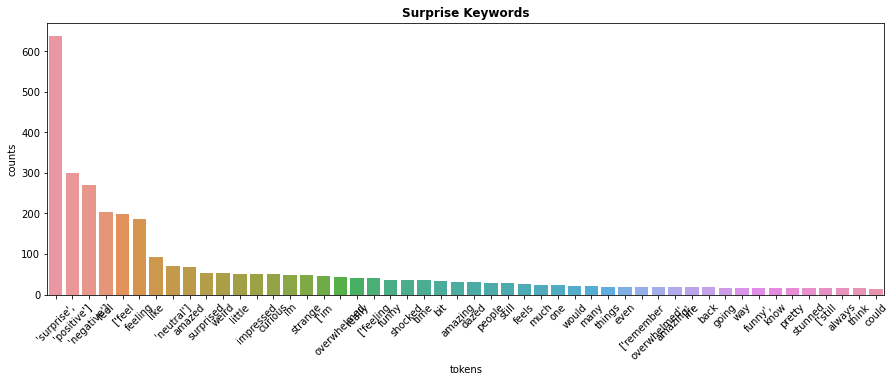

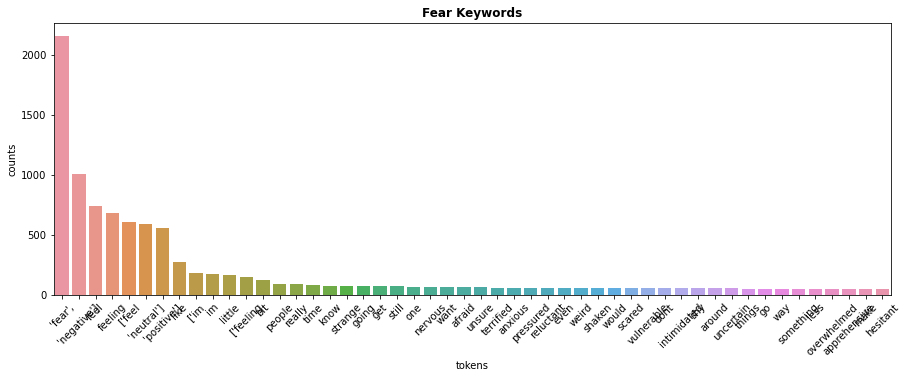

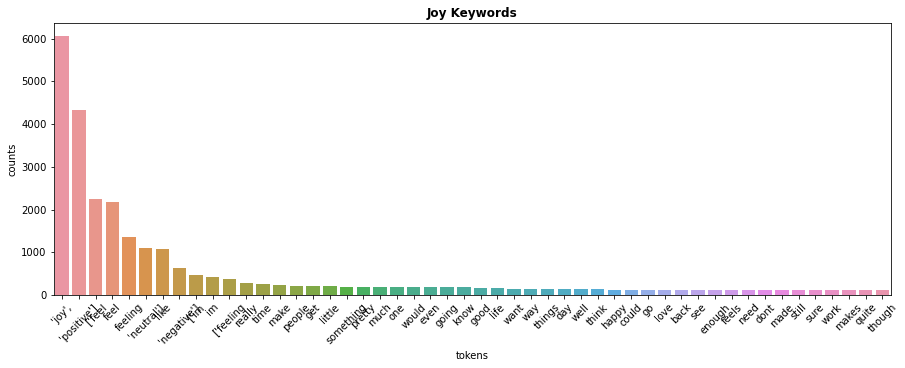

In [221]:
#plot keywords
draw_plot_keywords(sadness_keywords, 'Sadness Keywords')
draw_plot_keywords(anger_keywords,'Anger Keywords')
draw_plot_keywords(love_keywords,'Love Keywords')
draw_plot_keywords(surprise_keywords,'Surprise Keywords')
draw_plot_keywords(fear_keywords,'Fear Keywords')
draw_plot_keywords(joy_keywords,'Joy Keywords')

In [222]:
#create a another one function to draw the worldcloud 
def draw_wordcloud_keywords(text, title):
    plt.figure(figsize=(20,5))
    ma_wordcloud = WordCloud(width=4000, height=1000, 
                        font_path='font.ttf',
                      background_color='white').generate(text)
    plt.axis('off')
    plt.imshow(ma_wordcloud)
    plt.title(title, fontweight='bold', fontsize='25')
    plt.show()

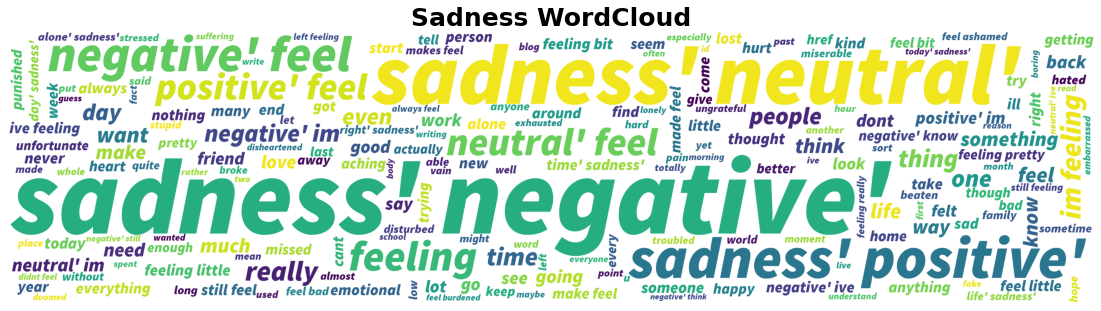

************************************************************************************************************


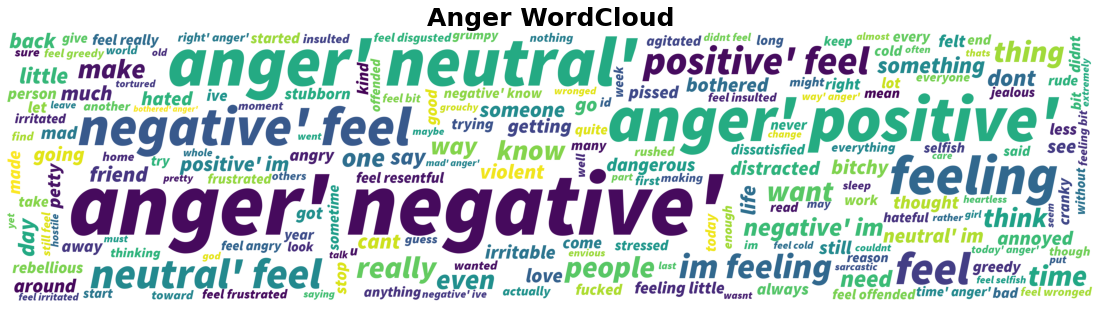

************************************************************************************************************


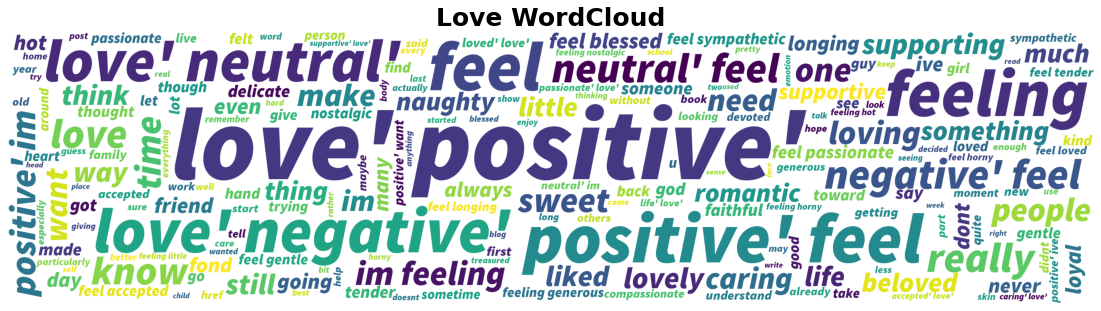

************************************************************************************************************


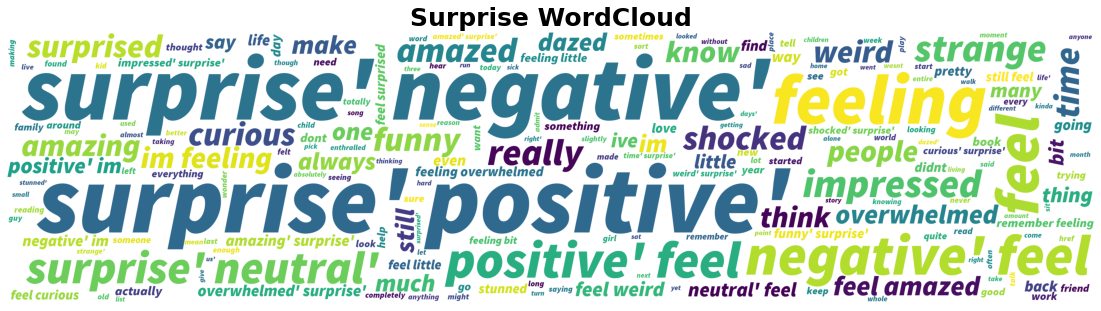

************************************************************************************************************


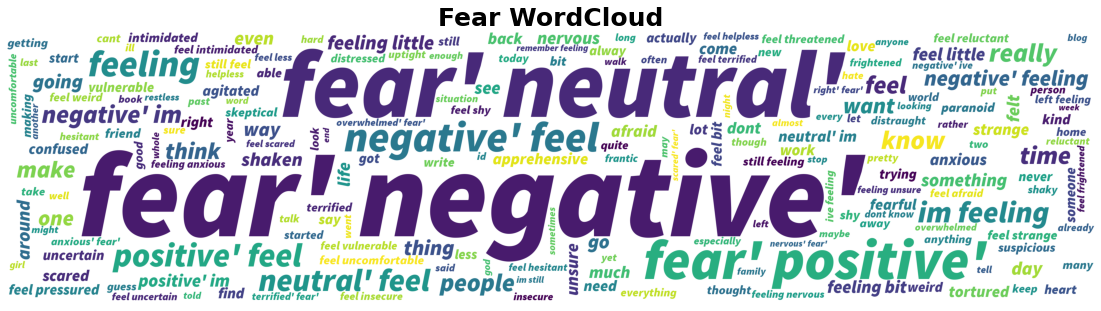

************************************************************************************************************


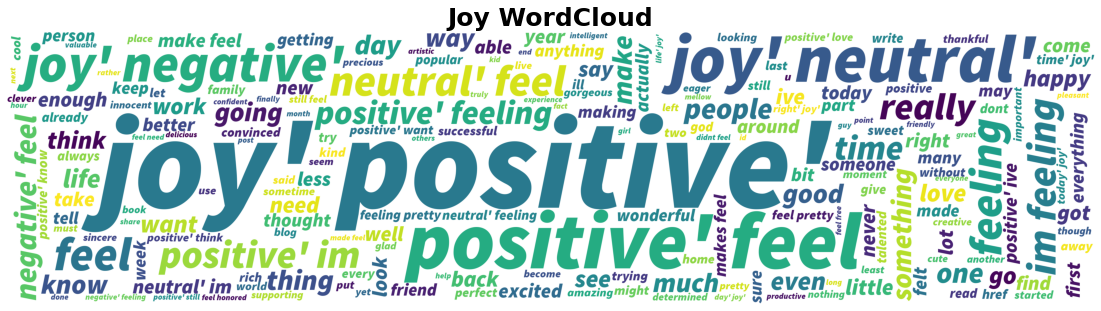

************************************************************************************************************


In [223]:
#plot the wordcloud
draw_wordcloud_keywords(sadness_document, 'Sadness WordCloud')
print("**"*54)
draw_wordcloud_keywords(anger_document,'Anger WordCloud')
print("**"*54)
draw_wordcloud_keywords(love_document,'Love WordCloud')
print("**"*54)
draw_wordcloud_keywords(surprise_document,'Surprise WordCloud')
print("**"*54)
draw_wordcloud_keywords(fear_document,'Fear WordCloud')
print("**"*54)
draw_wordcloud_keywords(joy_document,'Joy WordCloud')
print("**"*54)

In [224]:
#save the dataset
data.to_csv('emotion_cleanned_dataset.csv')

<h3>Data Preprocessing</h3>

In [225]:
#encode the emotion text into the numerical variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['emotion'])

data[['text','label','emotion']].drop_duplicates(keep='first').head()

,text,label,emotion
0,didnt feel humiliated,4,sadness
1,go feeling hopeless damned hopeful around some...,4,sadness
2,im grabbing minute post feel greedy wrong,0,anger
3,ever feeling nostalgic fireplace know still pr...,3,love
4,feeling grouchy,0,anger
